In [1]:
import numpy as np
import pandas as pd
DATASET_PATH_TRAIN = 'train.csv'
DATASET_PATH_TEST = 'test.csv'
PREPARED_DATASET_PATH = 'Taerov_predictions.csv'

df_train = pd.read_csv(DATASET_PATH_TRAIN)
df_test = pd.read_csv(DATASET_PATH_TEST)

#df_train.sample(100)
#df_test.sample(10)
#df_train.shape
#df_test.shape
#df_train.dtypes
#df_test.shape
#df_test.dtypes
#df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [2]:
# перед преобразованием типа данных "Rooms" в df_train к типу int64 проверяем:
# нет ли среди значений количества комнат не целых значений
import math
index = 0
rooms_var = 0
for i in range(df_train.shape[0]):
  index+= 1
  rooms_var+= math.modf(df_train.Rooms[i])[0]
if rooms_var > 0:
  print (f"Нецелые значения количества комнат имеются у {index} домов")
else:
  print (f"Нецелых значений количества комнат в df_train нет")

Нецелых значений количества комнат в df_train нет


In [3]:
# перед преобразованием типа данных "Rooms" в df_test к типу int64 проверяем:
# нет ли среди значений количества комнат не целых значений
index = 0
rooms_var = 0
for i in range(df_test.shape[0]):
  index+= 1
  rooms_var+= math.modf(df_test.Rooms[i])[0]
if rooms_var > 0:
  print (f"Нецелые значения количества комнат имеются у {index} домов")
else:
  print (f"Нецелых значений количества комнат в df_test нет")

Нецелых значений количества комнат в df_test нет


In [4]:
# Меняем тип данных "Rooms" в df_train и df_test на "int"
df_train['Rooms'] = df_train['Rooms'].astype('int')
df_test['Rooms'] = df_test['Rooms'].astype('int')
print(df_train['Rooms'].dtype)
print(df_test['Rooms'].dtype)

int64
int64


In [5]:
# перед преобразованием типа данных "HouseFloor" в df_train к типу int64
#проверяем: нет ли среди значений этажности домов не целых значений
index = 0
housefloor_var = 0
for i in range(df_train.shape[0]):
  index+= 1
  housefloor_var+= math.modf(df_train.HouseFloor[i])[0]
if housefloor_var > 0:
  print (f"Нецелые значения этажности домов имеются у {index} домов")
else:
  print (f"Нецелых значений этажности домов в df_train нет")

Нецелых значений этажности домов в df_train нет


In [6]:
# перед преобразованием типа данных "HouseFloor" в df_test к типу int64
# проверяем: нет ли среди значений этажности домов не целых значений
index = 0
housefloor_var = 0
for i in range(df_train.shape[0]):
  index+= 1
  housefloor_var+= math.modf(df_train.HouseFloor[i])[0]
if housefloor_var > 0:
  print (f"Нецелые значения этажности домов имеются у {index} домов")
else:
  print (f"Нецелых значений этажности домов в df_test нет")

Нецелых значений этажности домов в df_test нет


In [7]:
# Меняем тип данных "HouseFloor" в df_train и df_test на "int"
df_train['HouseFloor'] = df_train['HouseFloor'].astype('int')
df_test['HouseFloor'] = df_test['HouseFloor'].astype('int')
print(df_train['HouseFloor'].dtype)
print(df_test['HouseFloor'].dtype)

int64
int64


In [8]:
df_train['Healthcare_1'].isnull()

0        True
1       False
2       False
3       False
4       False
        ...  
9995    False
9996     True
9997     True
9998    False
9999    False
Name: Healthcare_1, Length: 10000, dtype: bool

In [9]:
df_train['Healthcare_1'].median()

900.0

In [10]:
# заполняем пропуски в столбце Healthcare_1 в df_train и df_test медианным
# значением по всему столбцу

df_train.loc[df_train['Healthcare_1'].isnull(), 'Healthcare_1'] = df_train['Healthcare_1'].median()
df_test.loc[df_test['Healthcare_1'].isnull(), 'Healthcare_1'] = df_test['Healthcare_1'].median()

In [11]:
df_train['Healthcare_1'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Healthcare_1, Length: 10000, dtype: bool

In [12]:
# перед преобразованием типа данных "Healthcare_1" в df_train к типу int64
# проверяем: нет ли среди показателей местности, связанных с охраной здоровья
# "Healthcare_1" не целых значений.

index = 0
healthcare_var_fract = 0
for i in range(df_train.shape[0]):
  if math.isnan(df_train.Healthcare_1[i]) == False:
    index+= 1
    healthcare_var_fract+= math.modf(df_train.Healthcare_1[i])[0]
if healthcare_var_fract > 0:
  print ('Нецелые значения показателей местности, связанных с охраной здоровья')
  print (f' "Healthcare_1" имеются у {index} домов')
else:
  print ('Нецелых значений показателей местности, связанных с охраной здоровья')
  print (f' "Healthcare_1" нет')
print('Количество значений NaN в столбце "Healthcare_1" - ')
print(f'{df_train.shape[0]-index} при общем количестве значений столбца - ')
print(f'{df_train.shape[0]}')

Нецелых значений показателей местности, связанных с охраной здоровья
 "Healthcare_1" нет
Количество значений NaN в столбце "Healthcare_1" - 
0 при общем количестве значений столбца - 
10000


In [13]:
# перед преобразованием типа данных "Healthcare_1" в df_test к типу int64
# проверяем: нет ли среди показателей местности, связанных с охраной здоровья
# "Healthcare_1" не целых значений.

index = 0
healthcare_var_fract = 0
for i in range(df_test.shape[0]):
  if math.isnan(df_test.Healthcare_1[i]) == False:
    index+= 1
    healthcare_var_fract+= math.modf(df_test.Healthcare_1[i])[0]
if healthcare_var_fract > 0:
  print('Нецелые значения показателей местности, связанных с охраной здоровья ')
  print (f'"Healthcare_1" имеются у {index} домов')
else:
  print('Нецелых значений показателей местности, связанных с охраной здоровья ')
  print ('"Healthcare_1" нет')
print('Количество значений NaN в столбце "Healthcare_1" - ')
print(f'{df_test.shape[0]-index} при общем количестве значений столбца - ')
print(f'{df_test.shape[0]}')

Нецелых значений показателей местности, связанных с охраной здоровья 
"Healthcare_1" нет
Количество значений NaN в столбце "Healthcare_1" - 
0 при общем количестве значений столбца - 
5000


In [14]:
df_train.sample(100)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3664,14894,52,2,56.100972,NaN,1.0,18,17,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,175204.866790
7205,8187,99,2,50.018264,27.675253,6.0,1,9,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,177863.011266
7115,12685,23,1,43.559914,41.408366,0.0,16,17,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,108406.114817
7086,5513,74,1,53.202029,56.087838,1.0,18,1,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,186890.309296
1532,4188,21,2,48.688368,31.061864,5.0,9,14,1974,0.194489,B,B,47,8004,3,125.0,3,5,B,193429.051486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,2644,105,2,47.812673,33.291654,6.0,3,9,1969,0.069660,B,B,31,6119,4,900.0,1,2,B,206284.954892
9817,11754,64,3,65.440660,40.934110,7.0,7,9,1973,0.135650,B,B,46,7960,6,350.0,3,11,B,256402.086826
7672,754,27,1,44.848951,NaN,1.0,5,17,1977,0.072158,B,B,2,629,1,900.0,0,0,A,117699.181956
39,9371,23,2,60.503248,NaN,0.0,16,0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,229778.057902


In [15]:
# Меняем в df_train тип данных "Healthcare_1" на "int"
df_train['Healthcare_1'] = df_train['Healthcare_1'].astype('int')
df_train['Healthcare_1'].dtype

dtype('int64')

In [16]:
# Меняем  в df_test тип данных "Healthcare_1" на "int"
df_test['Healthcare_1'] = df_test['Healthcare_1'].astype('int')
df_test['Healthcare_1'].dtype

dtype('int64')

In [17]:
# проверим действительно ли признаки 'Ecology_2', 'Ecology_3' и 'Shops_2' в
# df_train можно привести к категориальному типу:
# для этого выведем их уникальные значения
print(df_train.Ecology_2.unique())
print(df_train.Ecology_3.unique())
print(df_train.Shops_2.unique())

['B' 'A']
['B' 'A']
['B' 'A']


In [18]:
# Меняем тип данных 'Ecology_2', 'Ecology_3' и 'Shops_2' в df_train на'category'
df_train['Ecology_2'] = df_train['Ecology_2'].astype('category')
df_train['Ecology_3'] = df_train['Ecology_3'].astype('category')
df_train['Shops_2'] = df_train['Shops_2'].astype('category')
print(f"Тип данных признака Ecology_2 - {df_train['Ecology_2'].dtype}")
print(f"Тип данных признака Ecology_3 - {df_train['Ecology_3'].dtype}")
print(f"Тип данных признака Shops_2 - {df_train['Shops_2'].dtype}")

Тип данных признака Ecology_2 - category
Тип данных признака Ecology_3 - category
Тип данных признака Shops_2 - category


In [19]:
# проверим действительно ли признаки 'Ecology_2', 'Ecology_3' и 'Shops_2'
# в df_test можно привести к категориальному типу:
# для этого выведем их уникальные значения
print(df_test.Ecology_2.unique())
print(df_test.Ecology_3.unique())
print(df_test.Shops_2.unique())

['B' 'A']
['B' 'A']
['B' 'A']


In [20]:
# Меняем тип данных 'Ecology_2', 'Ecology_3' и 'Shops_2' в df_test на 'category'
df_test['Ecology_2'] = df_test['Ecology_2'].astype('category')
df_test['Ecology_3'] = df_test['Ecology_3'].astype('category')
df_test['Shops_2'] = df_test['Shops_2'].astype('category')
print(f"Тип данных признака Ecology_2 - {df_test['Ecology_2'].dtype}")
print(f"Тип данных признака Ecology_3 - {df_test['Ecology_3'].dtype}")
print(f"Тип данных признака Shops_2 - {df_test['Shops_2'].dtype}")

Тип данных признака Ecology_2 - category
Тип данных признака Ecology_3 - category
Тип данных признака Shops_2 - category


In [21]:
# Меняем тип данных "id" на "str" в df_train и df_test, чтобы соответствующий
# столбец был исключен из отчета по числовым признакам
df_train['Id'] = df_train['Id'].astype('str')
df_test['Id'] = df_test['Id'].astype('str')
print(df_train['Id'].dtype)
print(df_test['Id'].dtype)

object
object


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  object  
 1   DistrictId     10000 non-null  int64   
 2   Rooms          10000 non-null  int64   
 3   Square         10000 non-null  float64 
 4   LifeSquare     7887 non-null   float64 
 5   KitchenSquare  10000 non-null  float64 
 6   Floor          10000 non-null  int64   
 7   HouseFloor     10000 non-null  int64   
 8   HouseYear      10000 non-null  int64   
 9   Ecology_1      10000 non-null  float64 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int64   
 13  Social_2       10000 non-null  int64   
 14  Social_3       10000 non-null  int64   
 15  Healthcare_1   10000 non-null  int64   
 16  Helthcare_2    10000 non-null  int64   
 17  Shops_1        10000 non-null  i

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             5000 non-null   object  
 1   DistrictId     5000 non-null   int64   
 2   Rooms          5000 non-null   int64   
 3   Square         5000 non-null   float64 
 4   LifeSquare     3959 non-null   float64 
 5   KitchenSquare  5000 non-null   float64 
 6   Floor          5000 non-null   int64   
 7   HouseFloor     5000 non-null   int64   
 8   HouseYear      5000 non-null   int64   
 9   Ecology_1      5000 non-null   float64 
 10  Ecology_2      5000 non-null   category
 11  Ecology_3      5000 non-null   category
 12  Social_1       5000 non-null   int64   
 13  Social_2       5000 non-null   int64   
 14  Social_3       5000 non-null   int64   
 15  Healthcare_1   5000 non-null   int64   
 16  Helthcare_2    5000 non-null   int64   
 17  Shops_1        5000 non-null   in

In [24]:
df_train_num_features = df_train.select_dtypes(include = ['float64', 'int64'])
df_train_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  int64  
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  int64  
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Social_1       10000 non-null  int64  
 10  Social_2       10000 non-null  int64  
 11  Social_3       10000 non-null  int64  
 12  Healthcare_1   10000 non-null  int64  
 13  Helthcare_2    10000 non-null  int64  
 14  Shops_1        10000 non-null  int64  
 15  Price          10000 non-null  float64
dtypes: float64(5), int64(11)
memory usage: 1.2 MB


In [25]:
df_train_num_features.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [26]:
df_train_num_features = df_train.select_dtypes(include = ['object', 'category'])
df_train_num_features.head()

,Id,Ecology_2,Ecology_3,Shops_2
0,14038,B,B,B
1,15053,B,B,B
2,4765,B,B,B
3,5809,B,B,B
4,10783,B,B,B


In [27]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [28]:
# выводим количество пропусков в df_train в процентах

100*(len(df_train) - df_train.count())/len(df_train)

Id                0.00
DistrictId        0.00
Rooms             0.00
Square            0.00
LifeSquare       21.13
KitchenSquare     0.00
Floor             0.00
HouseFloor        0.00
HouseYear         0.00
Ecology_1         0.00
Ecology_2         0.00
Ecology_3         0.00
Social_1          0.00
Social_2          0.00
Social_3          0.00
Healthcare_1      0.00
Helthcare_2       0.00
Shops_1           0.00
Shops_2           0.00
Price             0.00
dtype: float64

In [29]:
# выводим количество пропусков в df_test в процентах

100*(len(df_test) - df_test.count())/len(df_test)

Id                0.00
DistrictId        0.00
Rooms             0.00
Square            0.00
LifeSquare       20.82
KitchenSquare     0.00
Floor             0.00
HouseFloor        0.00
HouseYear         0.00
Ecology_1         0.00
Ecology_2         0.00
Ecology_3         0.00
Social_1          0.00
Social_2          0.00
Social_3          0.00
Healthcare_1      0.00
Helthcare_2       0.00
Shops_1           0.00
Shops_2           0.00
dtype: float64

In [30]:
# заполняем пропуски в столбце LifeSquare в df_train и df_test медианным
# значением по всему столбцу

df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['LifeSquare'].median()
df_test.loc[df_test['LifeSquare'].isnull(), 'LifeSquare'] = df_test['LifeSquare'].median()

In [31]:
# выводим количество пропусков в df_train в процентах

100*(len(df_train) - df_train.count())/len(df_train)

Id               0.0
DistrictId       0.0
Rooms            0.0
Square           0.0
LifeSquare       0.0
KitchenSquare    0.0
Floor            0.0
HouseFloor       0.0
HouseYear        0.0
Ecology_1        0.0
Ecology_2        0.0
Ecology_3        0.0
Social_1         0.0
Social_2         0.0
Social_3         0.0
Healthcare_1     0.0
Helthcare_2      0.0
Shops_1          0.0
Shops_2          0.0
Price            0.0
dtype: float64

In [32]:
# выводим количество пропусков в df_test в процентах

100*(len(df_test) - df_test.count())/len(df_test)

Id               0.0
DistrictId       0.0
Rooms            0.0
Square           0.0
LifeSquare       0.0
KitchenSquare    0.0
Floor            0.0
HouseFloor       0.0
HouseYear        0.0
Ecology_1        0.0
Ecology_2        0.0
Ecology_3        0.0
Social_1         0.0
Social_2         0.0
Social_3         0.0
Healthcare_1     0.0
Helthcare_2      0.0
Shops_1          0.0
Shops_2          0.0
dtype: float64

In [33]:
df_train.columns[0:]

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [34]:
# отбрасываем колонку с признаком "id", как лишнюю

df_train = df_train[df_train.columns[1:]]
df_train.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [35]:
df_test.columns[0:]

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

In [36]:
# отбрасываем колонку с признаком "id", как лишнюю

df_test = df_test[df_test.columns[1:]]
df_test.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2'],
      dtype='object')

In [37]:

# преобразовываем в "df_train" категориальные признаки: 'Ecology_2', 'Ecology_3'
# и 'Shops_2' в несколько бинарных 

df_train = pd.concat([df_train, pd.get_dummies(df_train['Ecology_2'], prefix = 'Ecology_2')], axis = 1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Ecology_3'], prefix = 'Ecology_3')], axis = 1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Shops_2'], prefix = 'Shops_2')], axis = 1)


df_train.sample(10)


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
8449,39,3,61.708595,45.456956,5.0,7,9,1970,0.428826,B,...,0,2,B,250913.153054,0,1,0,1,0,1
1499,120,2,85.087643,77.976325,10.0,7,10,2020,0.341072,B,...,3,11,B,536020.260344,0,1,0,1,0,1
7031,35,2,61.253236,32.781260,0.0,7,0,1977,0.089040,B,...,0,11,B,263718.553031,0,1,0,1,0,1
4891,129,2,63.997877,37.124463,7.0,6,5,1963,0.020741,B,...,2,5,B,286137.554034,0,1,0,1,0,1
9446,85,2,58.121619,34.345009,9.0,8,16,1979,0.037178,B,...,1,7,B,272583.855530,0,1,0,1,0,1
5875,97,2,46.629846,33.223279,5.0,5,5,1960,0.486246,B,...,0,6,B,85940.112186,0,1,0,1,0,1
5809,48,1,43.656886,20.302453,9.0,6,24,2014,0.041125,B,...,1,10,B,135982.440250,0,1,0,1,0,1
9816,6,2,66.463294,32.781260,1.0,16,17,1977,0.243205,B,...,0,0,B,179054.741520,0,1,0,1,0,1
7629,15,1,38.070362,23.339445,6.0,9,12,2008,0.158249,B,...,1,0,B,160185.632085,0,1,0,1,0,1
2926,62,1,38.005975,1.549931,1.0,13,15,2017,0.072158,B,...,0,0,A,107147.609125,0,1,0,1,1,0


In [38]:
# преобразовываем в "df_test" категориальные признаки: 'Ecology_2', 'Ecology_3'
# и 'Shops_2' в несколько бинарных 

df_test = pd.concat([df_test, pd.get_dummies(df_test['Ecology_2'], prefix = 'Ecology_2')], axis = 1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Ecology_3'], prefix = 'Ecology_3')], axis = 1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Shops_2'], prefix = 'Shops_2')], axis = 1)


df_test.sample(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
4648,156,2,52.818877,34.616208,9.0,12,17,2008,0.007659,B,...,2301,3,19,B,0,1,0,1,0,1
691,47,2,55.701660,34.585574,9.0,10,17,2002,0.000070,B,...,240,1,16,B,0,1,0,1,0,1
561,99,2,46.334892,28.343301,6.0,4,9,1970,0.033494,B,...,1322,3,8,B,0,1,0,1,0,1
4636,5,2,44.548320,31.413470,5.0,11,14,1973,0.150818,B,...,2643,4,5,B,0,1,0,1,0,1
608,30,1,2.645046,4.338755,1.0,2,1,1977,0.000078,B,...,1046,3,23,B,0,1,0,1,0,1
3279,9,3,78.078130,44.440745,9.0,9,11,2016,0.161532,B,...,30,2,4,B,0,1,0,1,0,1
3240,61,2,41.665458,24.842906,6.0,5,14,1980,0.300323,B,...,900,1,9,B,0,1,0,1,0,1
3353,47,1,34.605496,22.565667,6.0,8,9,1969,0.298205,B,...,900,1,3,B,0,1,0,1,0,1
668,27,1,48.159571,45.676078,1.0,3,1,1977,0.072158,B,...,900,0,0,A,0,1,0,1,1,0
1596,62,1,34.936968,31.776002,9.0,23,22,2015,0.072158,B,...,900,0,0,A,0,1,0,1,1,0


In [39]:
# Меняем тип данных 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B',
# 'Shops_2_A' и 'Shops_2_B' в df_train на 'int64'
df_train['Ecology_2_A'] = df_train['Ecology_2_A'].astype('int64')
df_train['Ecology_2_B'] = df_train['Ecology_2_B'].astype('int64')
df_train['Ecology_3_A'] = df_train['Ecology_3_A'].astype('int64')
df_train['Ecology_3_B'] = df_train['Ecology_3_B'].astype('int64')
df_train['Shops_2_A'] = df_train['Shops_2_A'].astype('int64')
df_train['Shops_2_B'] = df_train['Shops_2_B'].astype('int64')
print(f"Тип данных признака Ecology_2_A - {df_train['Ecology_2_A'].dtype}")
print(f"Тип данных признака Ecology_2_B - {df_train['Ecology_2_B'].dtype}")
print(f"Тип данных признака Ecology_3_A - {df_train['Ecology_3_A'].dtype}")
print(f"Тип данных признака Ecology_3_B - {df_train['Ecology_3_B'].dtype}")
print(f"Тип данных признака Shops_2_A - {df_train['Shops_2_A'].dtype}")
print(f"Тип данных признака Shops_2_B - {df_train['Shops_2_B'].dtype}")

Тип данных признака Ecology_2_A - int64
Тип данных признака Ecology_2_B - int64
Тип данных признака Ecology_3_A - int64
Тип данных признака Ecology_3_B - int64
Тип данных признака Shops_2_A - int64
Тип данных признака Shops_2_B - int64


In [40]:
# Меняем тип данных 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B',
# 'Shops_2_A' и 'Shops_2_B' в df_test на 'int64'
df_test['Ecology_2_A'] = df_test['Ecology_2_A'].astype('int64')
df_test['Ecology_2_B'] = df_test['Ecology_2_B'].astype('int64')
df_test['Ecology_3_A'] = df_test['Ecology_3_A'].astype('int64')
df_test['Ecology_3_B'] = df_test['Ecology_3_B'].astype('int64')
df_test['Shops_2_A'] = df_test['Shops_2_A'].astype('int64')
df_test['Shops_2_B'] = df_test['Shops_2_B'].astype('int64')
print(f"Тип данных признака Ecology_2_A - {df_test['Ecology_2_A'].dtype}")
print(f"Тип данных признака Ecology_2_B - {df_test['Ecology_2_B'].dtype}")
print(f"Тип данных признака Ecology_3_A - {df_test['Ecology_3_A'].dtype}")
print(f"Тип данных признака Ecology_3_B - {df_test['Ecology_3_B'].dtype}")
print(f"Тип данных признака Shops_2_A - {df_test['Shops_2_A'].dtype}")
print(f"Тип данных признака Shops_2_B - {df_test['Shops_2_B'].dtype}")

Тип данных признака Ecology_2_A - int64
Тип данных признака Ecology_2_B - int64
Тип данных признака Ecology_3_A - int64
Тип данных признака Ecology_3_B - int64
Тип данных признака Shops_2_A - int64
Тип данных признака Shops_2_B - int64


In [41]:
#

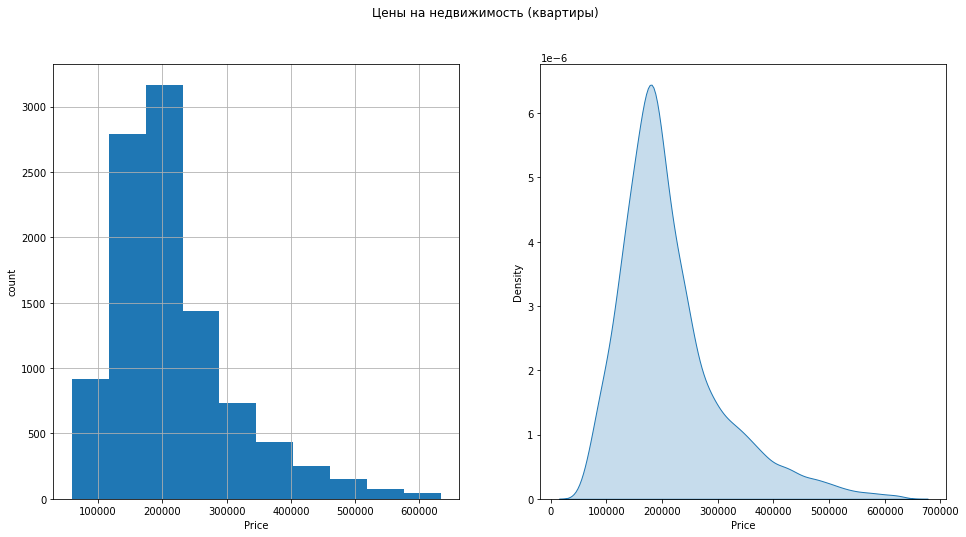

In [42]:
# приступим к визуализации данных
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_train_v = pd.read_csv(DATASET_PATH_TRAIN)
df_test_v = pd.read_csv(DATASET_PATH_TEST)


# выведем гистограмму зависимости количества объектов недвижимости (квартир) в
# зависимости от их цены и график распределения плотности вероятности стоимости
# объекта недвижимости (квартиры)

plt.figure(figsize = (16,8))
plt.subplot(121)
df_train_v['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df_train_v['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Цены на недвижимость (квартиры)')
plt.show()

In [43]:
# вычислим среднюю стоимость, медианную стоимость и моду объекта недвижимости
# (квартиры) и убедимся, что распределение признака 'Price' не является
# нормальным

target_mean = round(df_train_v['Price'].mean(), 2)
target_median = df_train_v['Price'].median()
target_mode = df_train_v['Price'].mode()[0]

target_mean, target_median, target_mode

(214138.86, 192269.64487934904, 59174.77802758123)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


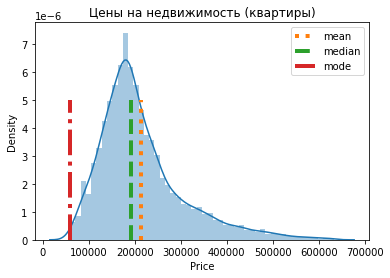

In [44]:
# выведем график распределения плотности вероятности стоимости и добавим на него
# значения средней стоимости, медианной стоимости и моды объекта недвижимости
# (квартиры) и убедимся, что распределение смещено в сторону объектов с более
# высокой стоимостью

sns.distplot(df_train_v['Price'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean]*100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median]*100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode]*100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Цены на недвижимость (квартиры)')
plt.legend()
plt.show()

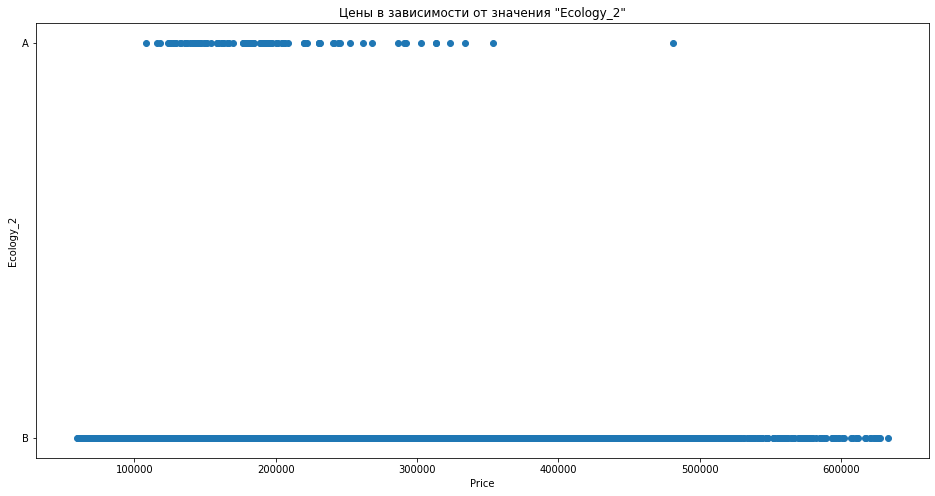

In [45]:
# приступим к анализу категориальных признаков
# для выявления нелинейной зависимости признаков выведем график рассеяния
# категориального признака "Ecology_2" в зависимости от цены объектов
# недвижимости (квартир)
# распределение объектов категории 'Ecology_2' смещено в сторону недорогих
# объектов недвижимости

plt.figure(figsize=(16, 8))
plt.scatter(df_train_v['Price'], df_train_v['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Цены в зависимости от значения "Ecology_2"')
plt.show()

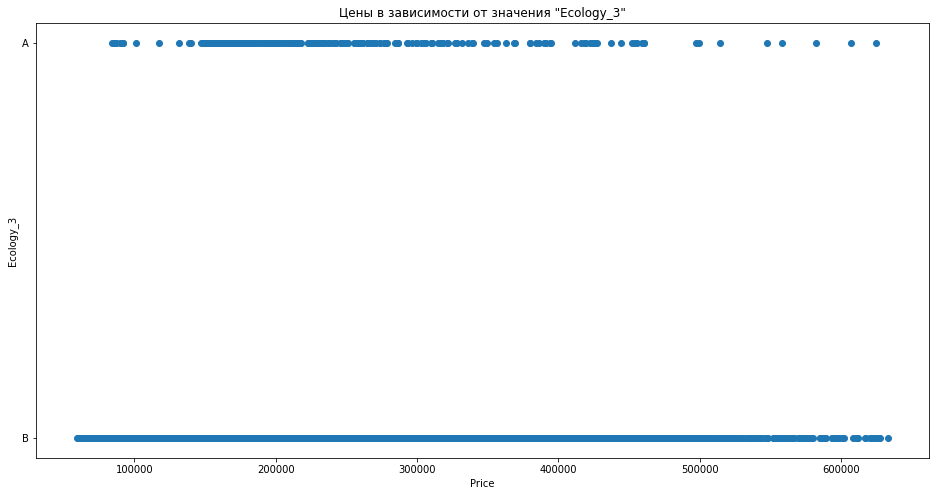

In [46]:
# для выявления нелинейной зависимости признаков выведем график рассеяния
# категориального признака "Ecology_3" в зависимости от цены объектов
# недвижимости (квартир)
# распределение объектов категории 'Ecology_3' смещено в сторону недорогих
# объектов недвижимости

plt.figure(figsize=(16, 8))
plt.scatter(df_train_v['Price'], df_train_v['Ecology_3'])

plt.xlabel('Price')
plt.ylabel('Ecology_3')
plt.title('Цены в зависимости от значения "Ecology_3"')
plt.show()

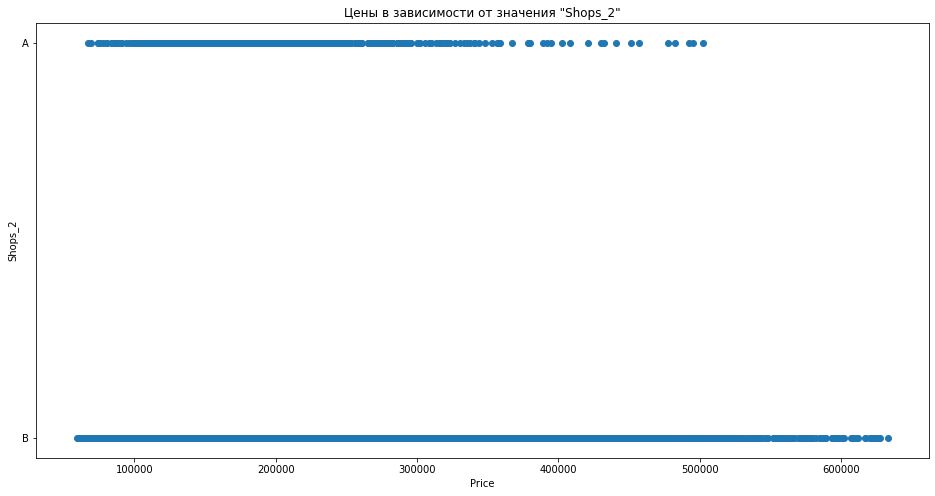

In [47]:
# для выявления нелинейной зависимости признаков выведем график рассеяния
# категориального признака "Shops_2" в зависимости от цены объектов недвижимости
# (квартир)
# распределение объектов категории 'Shops_2' смещено в сторону недорогих
# объектов недвижимости

plt.figure(figsize=(16, 8))
plt.scatter(df_train_v['Price'], df_train_v['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.title('Цены в зависимости от значения "Shops_2"')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


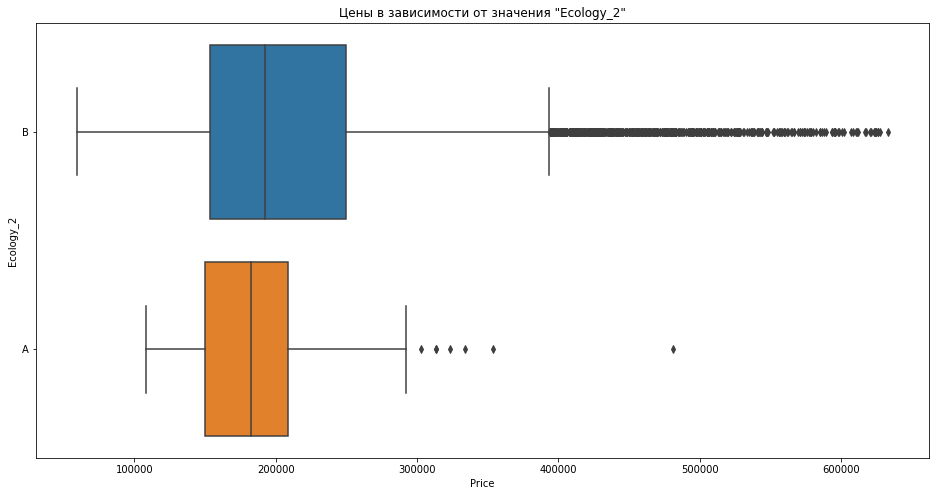

In [48]:
# с помощью "boxplot" проанализируем расположение медианного значения по
# отношению к границам выбросов по каждой из категорий признака "Ecology_2"
# к выбросам категории "В" относятся объекты недвижимости (квартиры) с ценой
# свыше 280000, а к выбросам категории "А" - свыше 400000.
plt.figure(figsize=(16, 8))
sns.boxplot(df_train_v['Price'], df_train_v['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Цены в зависимости от значения "Ecology_2"')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


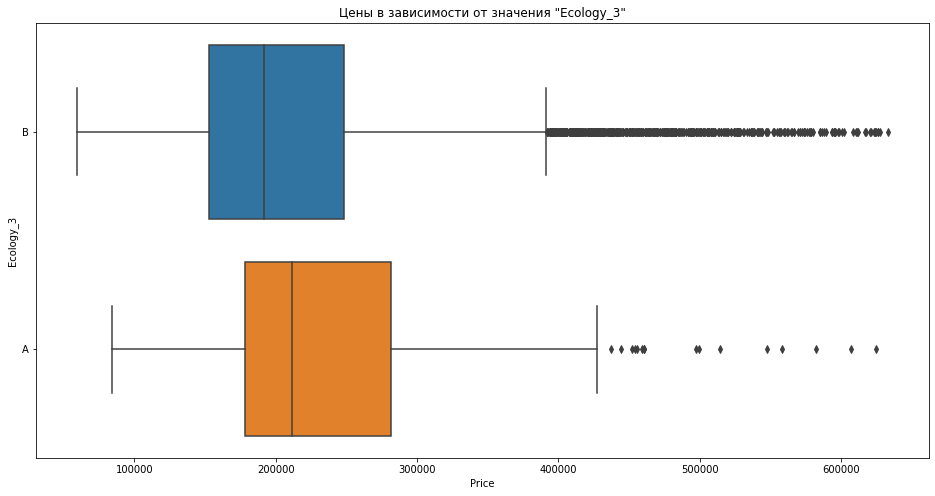

In [49]:
# с помощью "boxplot" проанализируем расположение медианного значения по
# отношению к границам выбросов по каждой из категорий признака "Ecology_3"
# к выбросам категории "В" относятся объекты недвижимости (квартиры) с ценой
# свыше 380000, а к выбросам категории "А" - свыше 430000.
plt.figure(figsize=(16, 8))
sns.boxplot(df_train_v['Price'], df_train_v['Ecology_3'])

plt.xlabel('Price')
plt.ylabel('Ecology_3')
plt.title('Цены в зависимости от значения "Ecology_3"')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


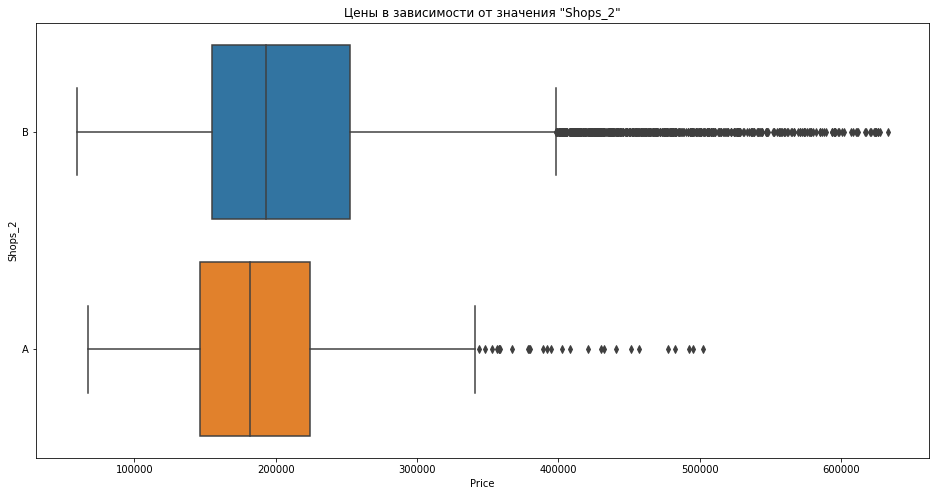

In [50]:
# с помощью "boxplot" проанализируем расположение медианного значения по
# отношению к границам выбросов по каждой из категорий признака "Shops_2"
# к выбросам категории "В" относятся объекты недвижимости (квартиры) с ценой
# свыше 340000, а к выбросам категории "А" - свыше 400000.
plt.figure(figsize=(16, 8))
sns.boxplot(df_train_v['Price'], df_train_v['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.title('Цены в зависимости от значения "Shops_2"')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


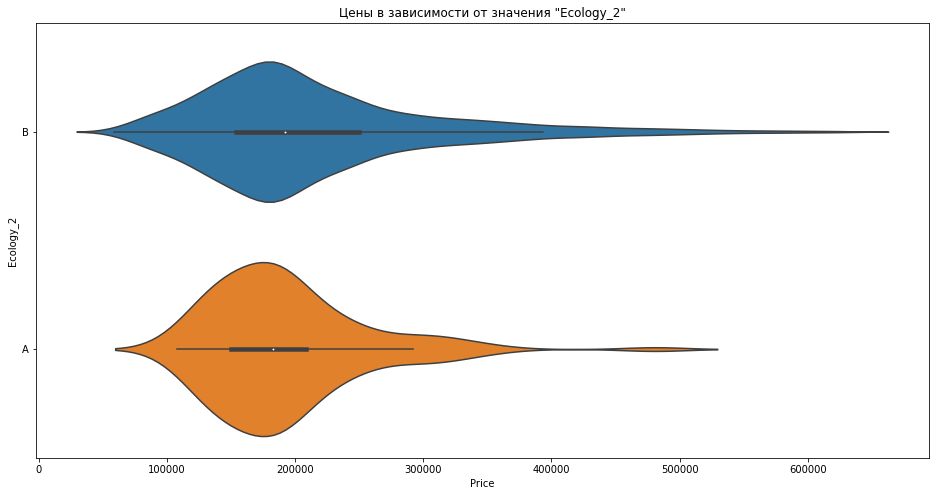

In [51]:
# с помощью "violinplot" проанализируем форму рапределения стоимости объектов
# недвижимости (квартир) по категориям признака "Ecology_2"

plt.figure(figsize=(16, 8))
sns.violinplot(df_train_v['Price'], df_train_v['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Цены в зависимости от значения "Ecology_2"')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


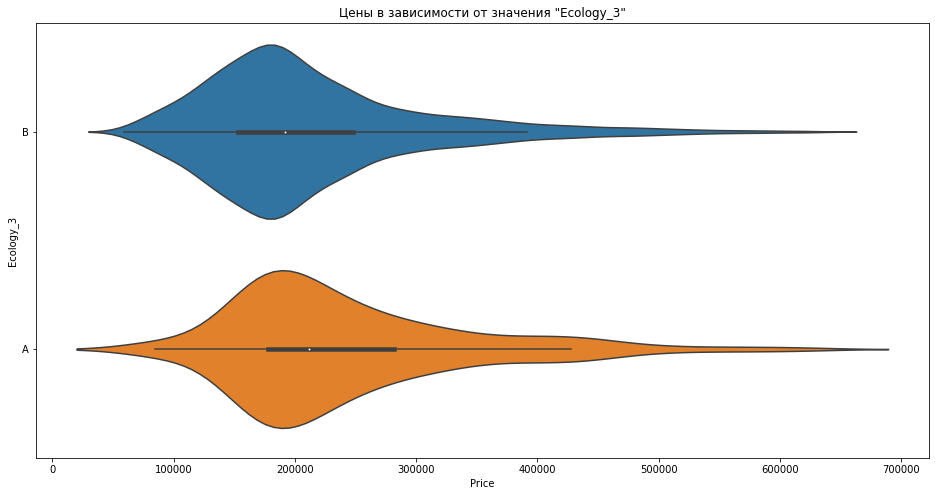

In [52]:
# с помощью "violinplot" проанализируем форму рапределения стоимости объектов
# недвижимости (квартир) по категориям признака "Ecology_3"

plt.figure(figsize=(16, 8))
sns.violinplot(df_train_v['Price'], df_train_v['Ecology_3'])

plt.xlabel('Price')
plt.ylabel('Ecology_3')
plt.title('Цены в зависимости от значения "Ecology_3"')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


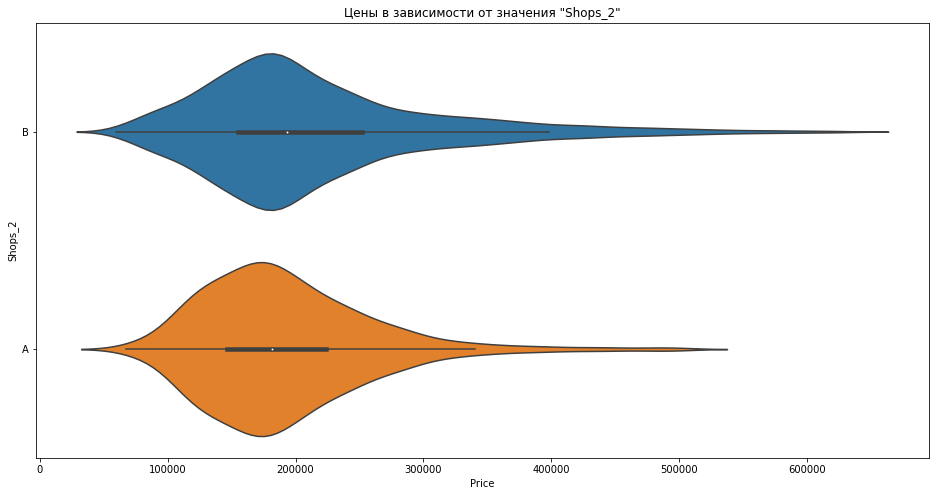

In [53]:
# с помощью "violinplot" проанализируем форму рапределения стоимости объектов
# недвижимости (квартир) по категориям признака "Shops_2"

plt.figure(figsize=(16, 8))
sns.violinplot(df_train_v['Price'], df_train_v['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.title('Цены в зависимости от значения "Shops_2"')
plt.show()

In [54]:
# приступим к анализу числовых признаков

df_train_num_features = df_train.select_dtypes(include='float64')


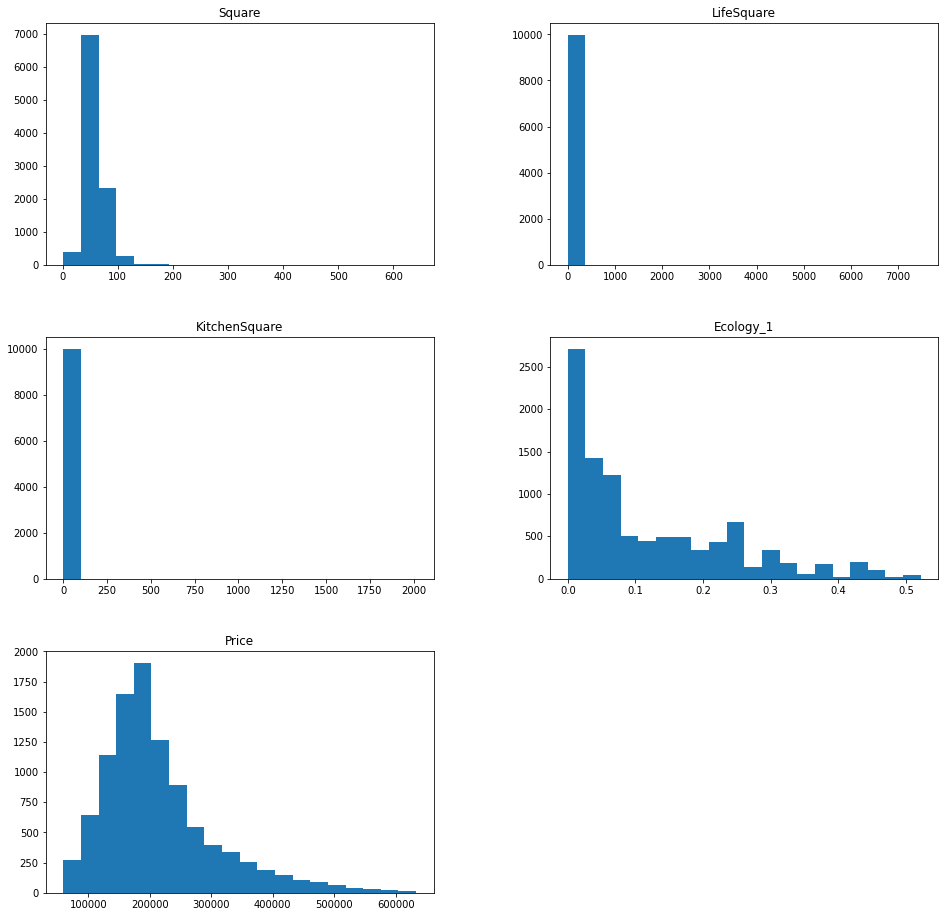

In [55]:
df_train_num_features.hist(figsize=(16,16), bins=20, grid=False)
plt.show()

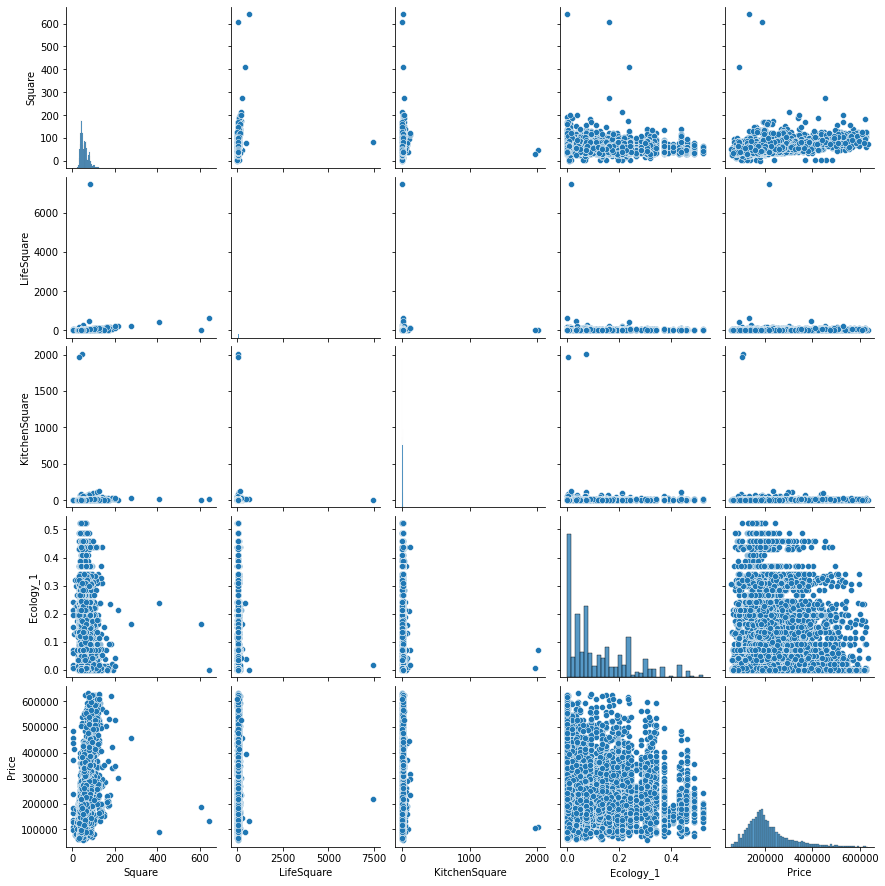

In [56]:
# с помощью "pairplot" строим графики рассеяния всех признаков в сочетании друг
# с другом
# наблюдается линейная и нелинейная зависимость остальных признаков между собой

sns.pairplot(df_train_num_features)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


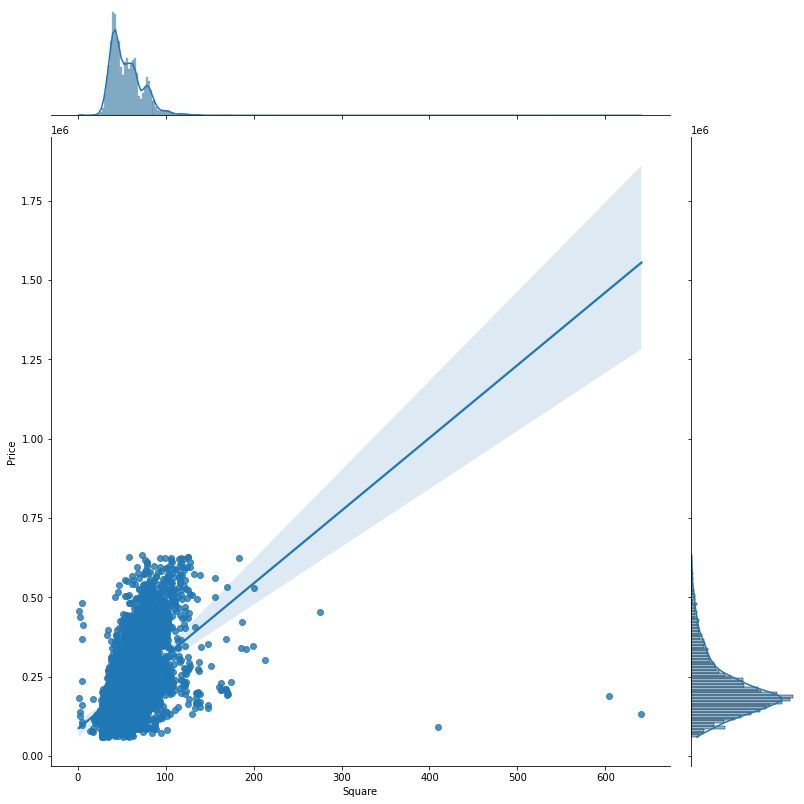

In [57]:
# построим график рассеяния зависимости признаков 'Square' и 'Price'
# также строим прямую отражающую оптимальную линейную зависимость признаков

grid = sns.jointplot(df_train_v['Square'], df_train_v['Price'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


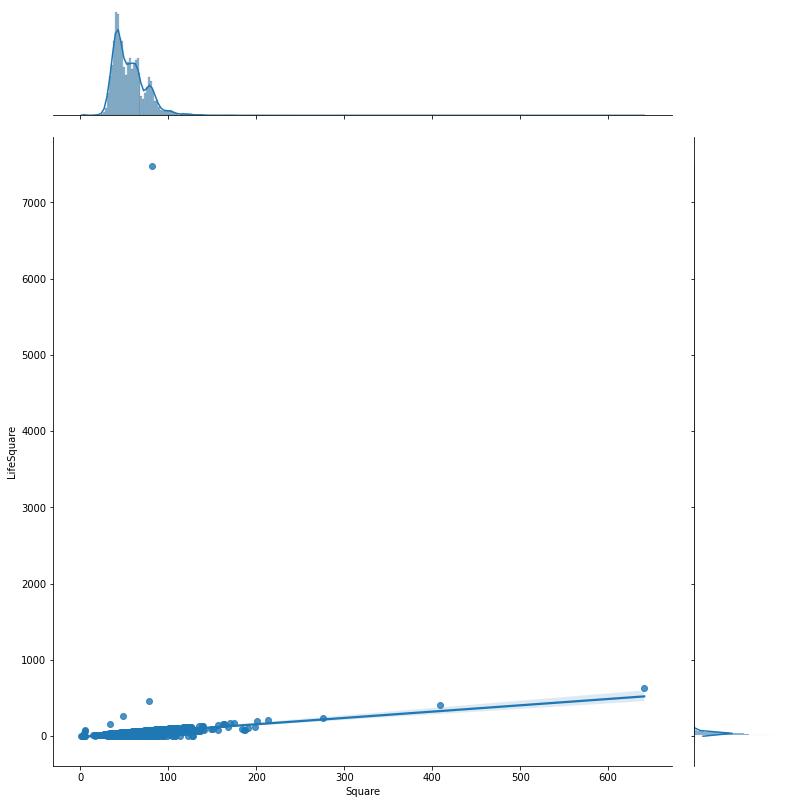

In [58]:
# построим график рассеяния зависимости признаков 'Square' и 'LifeSquare'
# также строим прямую отражающую оптимальную линейную зависимость признаков

grid = sns.jointplot(df_train_v['Square'], df_train_v['LifeSquare'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)
plt.show()

In [59]:
# приступим к анализу бинарных признаков

df_train_bin_features = df_train.select_dtypes(include='int64')
df_train_bin_features.drop( columns = ['DistrictId', 'Rooms', 'Floor', 'HouseFloor', 'HouseYear', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1'], inplace = True)
df_train_bin_features

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0,1,0,1,0,1
1,0,1,0,1,0,1
2,0,1,0,1,0,1
3,0,1,0,1,0,1
4,0,1,0,1,0,1
...,...,...,...,...,...,...
9995,0,1,0,1,0,1
9996,0,1,0,1,1,0
9997,0,1,0,1,1,0
9998,0,1,1,0,0,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

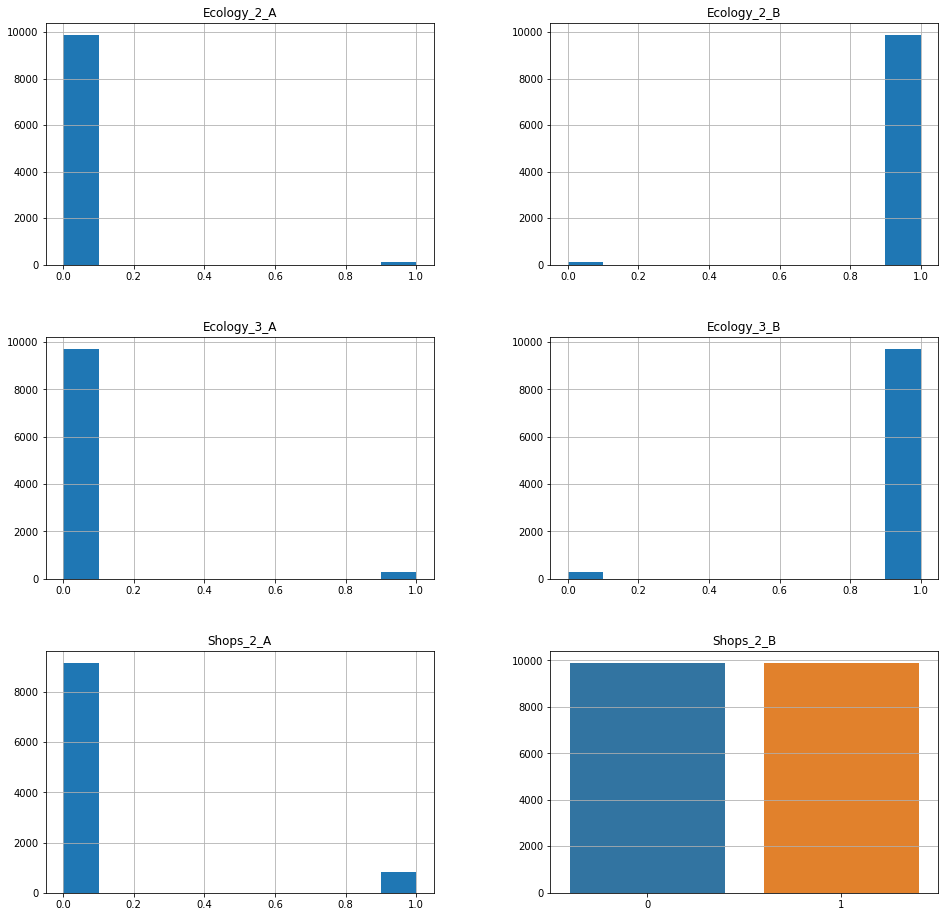

In [60]:
# проанализируем бинарные признаки
df_train_bin_features.hist(figsize=(16,16))

for i, colname in enumerate(df_train_bin_features.columns):
  counts = df_train_bin_features[colname].value_counts()

  plt.title(colname)
  sns.barplot(counts.index, counts.values)

plt.show()


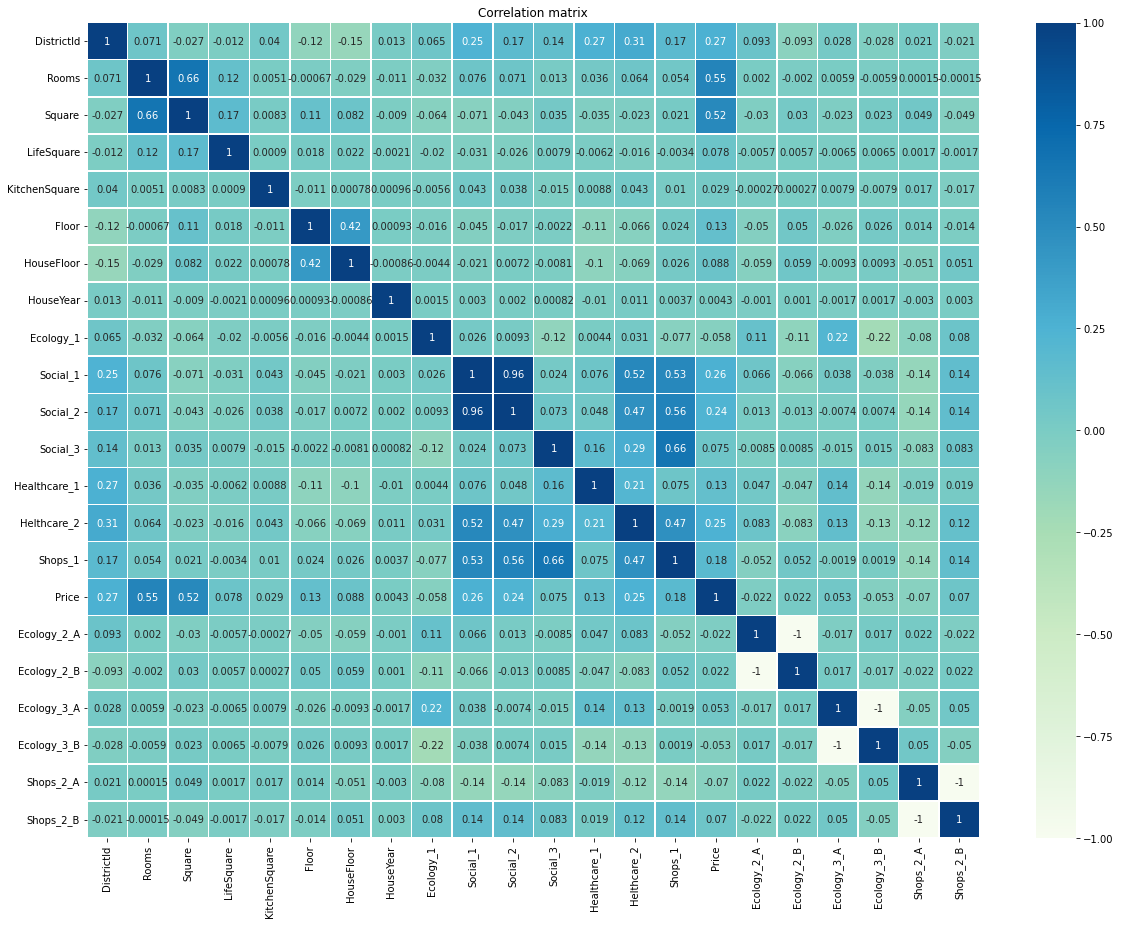

In [61]:
# построим матрицу корреляций признаков
# изучив данную матрицу можно убедиться
# # в существенной корреляции (в пределах от 0.42 до 0.66) следующих признаков:
# 'Rooms' c 'Square', 'Price';
# 'Square' с 'Price';
# 'Floor' c 'HouseFloor';
# 'Social_1' c 'Social_2', 'Healthcare_2', 'Shops_1';
# 'Social_2' c 'Healthcare_2', 'Shops_1';
# 'Social_3' c 'Shops_1';
# 'Healthcare_2' с 'Shops_1';
#
# в небольшой корреляции (в пределах от 0.1 до 0.27) следующих признаков:
# 'Districtid' c 'Floor', 'HouseFloor', 'Social_1', 'Social_2', 'Social_3',
# 'Healthcare_1', 'Healthcare_2', 'Shops_1', 'Price';
# 'Rooms' c 'LifeSquare';
# 'Square' с 'LifeSquare', 'Floor';
# 'Floor' c 'Price', 'Healthcare_1';
# 'HouseFloor' c 'Healthcare_1';
# 'Ecolodgy_1' с 'Social_3', 'Ecolodgy_2_A', 'Ecolodgy_2_B', 'Ecolodgy_3_A',
# 'Ecolodgy_3_B';
# 'Social_1' c 'Price', 'Shops_2_A', 'Shops_2_B';
# 'Social_2' c 'Price', 'Shops_2_A', 'Shops_2_B';
# 'Social_3' c 'Healthcare_1', 'Healthcare_2';
# 'Healthcare_1' c 'Healthcare_2', 'Price', 'Ecolodgy_3_A', 'Ecolodgy_3_B';
# 'Healthcare_2' c 'Price', 'Ecolodgy_3_A', 'Ecolodgy_3_B', 'Shops_2_A',
# 'Shops_2_B';
# 'Shops_1' c 'Price', 'Shops_2_A', 'Shops_2_B';
# 
# почти не имеют корреляции с остальными признаками (менее 0.05) следующие
# признаки: 'KitchenSquare', 'HouseYear';

plt.figure(figsize = (20,15))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show()

In [62]:
# приступаем к обучению с учителем

import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV


In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
matplotlib.rcParams.update({'font.size': 14.0})

In [65]:
# определим функцию, которая будет использована для оценки качества модели

def evalute_pred(true_values, pred_values):
  print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
        "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
        "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
  
  plt.figure(figsize=(10,10))
  
  sns.scatterplot(x=pred_values, y=true_values)

  plt.xlabel('Predicted values')
  plt.ylabel('True values')
  plt.title('True vs Predicted values')
  plt.show()

In [66]:
# выведем признаки списком

df_train.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [67]:
# рассмотрим распределение объектов по категориям признака 'Ecology_2'

df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [68]:
# рассмотрим распределение объектов по категориям признака 'Ecology_3'

df_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [69]:
# рассмотрим распределение объектов по категориям признака 'Shops_2'

df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [70]:
# исключаем из датасета дублирующиеся признаки

feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']
target_name = 'Price'

df_train = df_train[feature_names + [target_name]]
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,33,...,900,0,11,0,1,0,1,0,1,184966.930730
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,46,...,240,1,16,0,1,0,1,0,1,300009.450063
2,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,34,...,229,1,3,0,1,0,1,0,1,220925.908524
3,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,23,...,1084,0,5,0,1,0,1,0,1,175616.227217
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,35,...,2078,2,4,0,1,0,1,0,1,150226.531644


In [71]:
df_test = df_test[feature_names]
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,11,...,1,900,0,0,0,1,0,1,0,1
1,74,2,69.263183,32.925087,1.0,6,1,1977,0.075779,6,...,3,900,0,2,0,1,0,1,0,1
2,190,1,13.597819,15.948246,12.0,2,5,1909,0.000000,30,...,87,4702,5,5,0,1,0,1,0,1
3,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,23,...,3,900,3,3,0,1,0,1,0,1
4,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,2,...,1,900,0,0,0,1,0,1,1,0


In [72]:
# приступим к стандартизации признаков
# отберем признаки, принимающие значения типа 'float64'

feature_names_for_stand = df_train[feature_names].select_dtypes(include='float64').columns.tolist()
feature_names_for_stand

['Square', 'LifeSquare', 'KitchenSquare', 'Ecology_1']

In [73]:
# создадим датафрейм из нормализованных данных

scaler = StandardScaler()
stand_features = scaler.fit_transform(df_train[feature_names_for_stand])

In [74]:
df_train[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [75]:
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,35,2,-0.395780,-0.089070,-0.009569,7,9,1969,-0.250529,33,...,900,0,11,0,1,0,1,0,1,184966.930730
1,41,3,0.444867,0.049389,0.060460,7,9,1978,-0.998053,46,...,240,1,16,0,1,0,1,0,1,300009.450063
2,53,2,-0.539842,-0.092270,-0.219657,8,12,1968,-0.581588,34,...,229,1,3,0,1,0,1,0,1,220925.908524
3,58,2,-0.140699,0.214937,0.095474,8,17,1977,2.680470,23,...,1084,0,5,0,1,0,1,0,1,175616.227217
4,99,1,-0.791473,-0.163040,0.025445,11,12,1976,-0.894969,35,...,2078,2,4,0,1,0,1,0,1,150226.531644


In [76]:
df_test[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [77]:
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,58,2,-0.395780,-0.089070,-0.009569,6,14,1972,-0.250529,11,...,1,900,0,0,0,1,0,1,0,1
1,74,2,0.444867,0.049389,0.060460,6,1,1977,-0.998053,6,...,3,900,0,2,0,1,0,1,0,1
2,190,1,-0.539842,-0.092270,-0.219657,2,5,1909,-0.581588,30,...,87,4702,5,5,0,1,0,1,0,1
3,47,2,-0.140699,0.214937,0.095474,22,22,2007,2.680470,23,...,3,900,3,3,0,1,0,1,0,1
4,27,1,-0.791473,-0.163040,0.025445,17,17,2017,-0.894969,2,...,1,900,0,0,0,1,0,1,1,0


In [78]:
# разобьем данные "df_train" на тренировочную и тестовую часть

X = df_train[feature_names]
y = df_train[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

построим модель с помощью метода "GradientBoostingRegressor"

In [79]:
gb_model = GradientBoostingRegressor(random_state=20)

In [80]:
# подберем для метода "GradientBoostingRegressor" лучшие значения
# гиперпараметров с помощью метода "GridSearchCV"

#%%time

#params = {'n_estimators':[1,100,200,300,400], 'max_depth':[3, 5, 7, 9, 10]}

#gb = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=3,
# random_state=1000, shuffle=True), n_jobs=-1)
#gb.fit(X_train, y_train)

#print(gb.best_params_)

Результат подбора гиперпараметров для метода "GradientBoostingRegressor" с помощью метода "GridSearchCV": RandomForestRegressor(max_depth=5, n_estimators=200)

In [81]:
# применим для метода "GradientBoostingRegressor" подобранные ранее с помощью
# метода "GridSearchCV" гиперпараметры

final_model = GradientBoostingRegressor(n_estimators=200, max_depth=5)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

R2:	0.911
MAE:	18495.515
MSE:	765719880.091


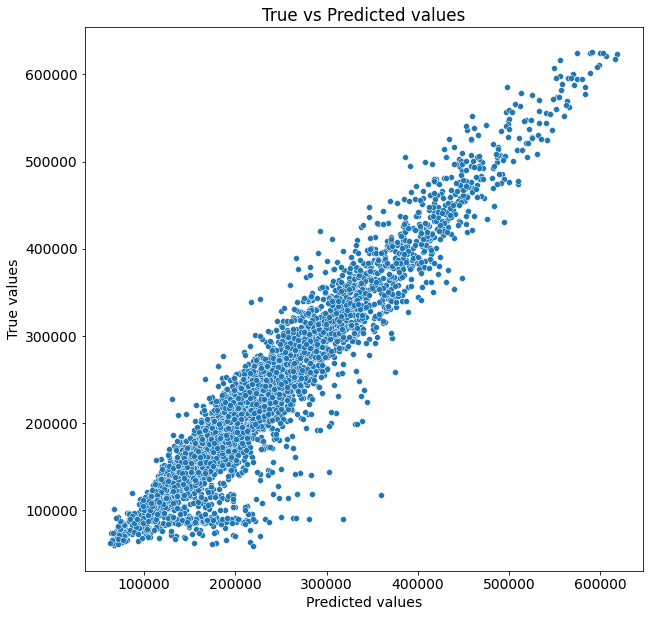

In [82]:
# выведем вместе значения метрик "R2", средней абсолютной ошибки и средней
# квадратичной ошибки для тренировочной части "df_train"

y_train_pred = final_model.predict(X_train)
evalute_pred(y_train, y_train_pred)

R2:	0.737
MAE:	27972.847
MSE:	2295674353.431


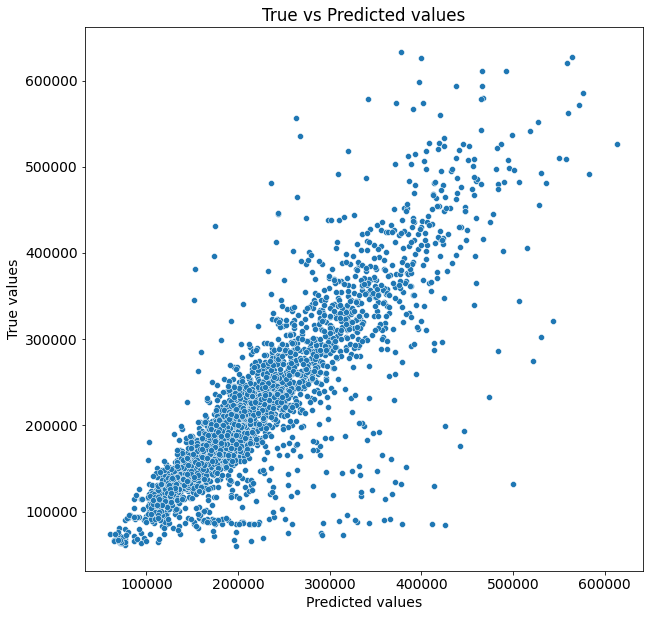

In [83]:
# выведем вместе значения метрик "R2", средней абсолютной ошибки и средней
# квадратичной ошибки для тестовой части "df_train"

y_test_pred = final_model.predict(X_test)
evalute_pred(y_test, y_test_pred)

Вывод: модель, построенная на тренировочной части данных "df_train" из датафрейма "train.csv" с помощью метода "GradientBoostingRegressor" показала удовлетворительный результат предсказания целевых значений признака "Price" для тестовой части данных "df_train".

In [84]:
# в переменную "test_gb_pred" сохраним результаты предсказания модели
# "GradientBoostingRegressor" на тестовой части датафрейма "df_test" (первые
# 3300 значений)

test_gb_pred = final_model.predict(df_test[feature_names][:3300])


R2:	-0.678
MAE:	90964.454
MSE:	14623520916.757


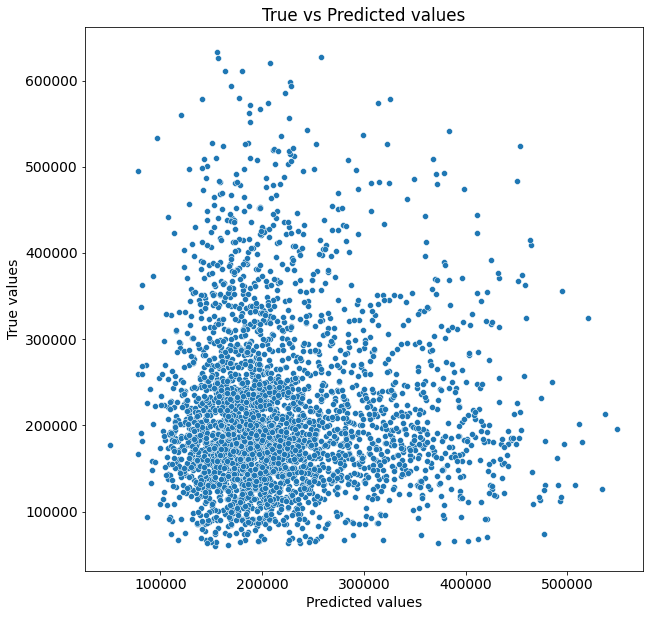

In [85]:
# проверяем качество предсказания модели "GradientBoostingRegressor" на части
# датафрейма "df_test" (первые 3300 значений)

evalute_pred(y_test, test_gb_pred)

In [86]:
# в переменную "test_gb_pred" сохраним результаты предсказания модели
# "GradientBoostingRegressor" на тестовой части датафрейма "df_test" (последние
# 3300 значений)

test_gb_pred = final_model.predict(df_test[feature_names][1700:5000])

R2:	-0.637
MAE:	89188.665
MSE:	14264638959.548


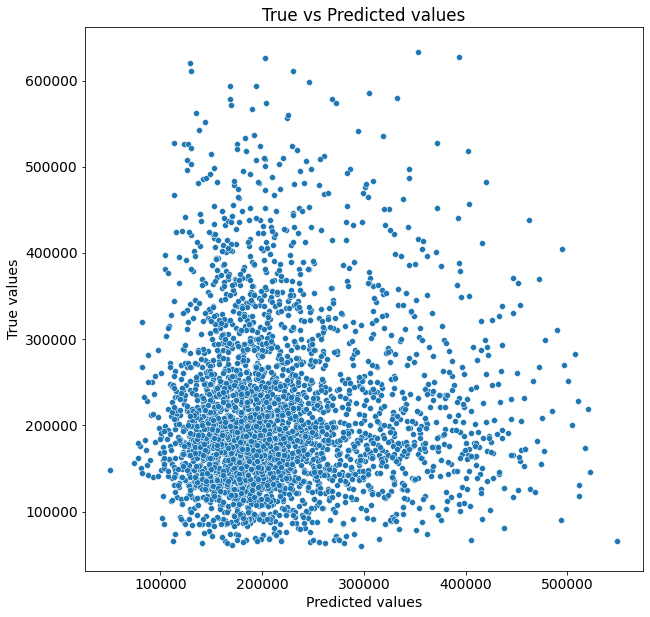

In [87]:
# проверяем качество предсказания модели "GradientBoostingRegressor" на части
# датафрейма "df_test" (последние 3300 значений)

evalute_pred(y_test, test_gb_pred)

Вывод: модель, построенная на тренировочной части данных "df_train" из датафрейма "train.csv" с помощью метода "GradientBoostingRegressor" показала неудовлетворительный результат предсказания целевых значений признака "Price" для датафрейма "test_csv".

In [88]:
SCALER_FILE_PATH = 'scaler.pkl'
with open(SCALER_FILE_PATH, 'wb') as file:
  pickle.dump(scaler, file)

MODEL_FILE_PATH = 'model.pkl'
with open(MODEL_FILE_PATH, 'wb') as file:
  pickle.dump(final_model, file)

In [89]:
test_gb_pred = final_model.predict(df_test[feature_names])
test_gb_pred

array([169606.82266628, 252903.71831821, 218930.64202747, ...,
       235398.47091501, 178869.44927922, 180354.40836884])

In [90]:
ind = np.array('1')
for i in range(4999):
  ind= np.append(ind, i+2)

In [91]:
itog = pd.DataFrame(ind)
itog

,0
0,1
1,2
2,3
3,4
4,5
...,...
4995,4996
4996,4997
4997,4998
4998,4999


In [92]:
itog.columns={'ID'}
itog

,ID
0,1
1,2
2,3
3,4
4,5
...,...
4995,4996
4996,4997
4997,4998
4998,4999


In [93]:
itog.insert(1, 'Price', test_gb_pred)
#itog = pd.DataFrame.concat(test_gb_pred)
itog

,ID,Price
0,1,169606.822666
1,2,252903.718318
2,3,218930.642027
3,4,219911.408755
4,5,117356.125202
...,...,...
4995,4996,307531.646018
4996,4997,166160.089240
4997,4998,235398.470915
4998,4999,178869.449279


In [94]:
PREPARED_DATASET_PATH = 'Taerov_predictions.csv'
itog.to_csv(PREPARED_DATASET_PATH, sep = ';', index = False, encoding = 'utf-8')